# **Calculando a Volatilidade de um Ativo Financeiro - Trading com Dados**

---

## **1. Instalando e importando bibliotecas**

In [17]:
!pip install yfinance --quiet
!pip install mplfinance --quiet

In [18]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd

## **2. Dados do ativo financeiro**

In [26]:
df = yf.download('BTC-USD', start='2020-01-01', end='2020-06-01')
df = df.drop(['Adj Close', 'Volume'], axis=1)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close
Date,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383
...,...,...,...,...
2020-05-27,8837.380859,9203.320312,8834.157227,9181.017578
2020-05-28,9184.945312,9546.319336,9148.457031,9525.750977
2020-05-29,9528.355469,9573.666992,9379.338867,9439.124023


## **3. Calculando retorno diário**

In [27]:
df['retorno'] = df['Close'].pct_change()
df

,Open,High,Low,Close,retorno
Date,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,NaN
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,-0.029819
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,0.051452
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,0.008955
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,0.000089
...,...,...,...,...,...
2020-05-27,8837.380859,9203.320312,8834.157227,9181.017578,0.039158
2020-05-28,9184.945312,9546.319336,9148.457031,9525.750977,0.037548
2020-05-29,9528.355469,9573.666992,9379.338867,9439.124023,-0.009094


## **4. Calculando média móvel**

In [31]:
df['media_movel'] = df['Close'].rolling(20).mean()
df

,Open,High,Low,Close,retorno,media_movel
Date,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,NaN,NaN
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,-0.029819,NaN
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,0.051452,NaN
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,0.008955,NaN
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,0.000089,NaN
...,...,...,...,...,...,...
2020-05-27,8837.380859,9203.320312,8834.157227,9181.017578,0.039158,9257.225977
2020-05-28,9184.945312,9546.319336,9148.457031,9525.750977,0.037548,9241.380225
2020-05-29,9528.355469,9573.666992,9379.338867,9439.124023,-0.009094,9233.641602


## **5. Calculando volatilidade**

In [39]:
df['volatilidade'] = df['retorno'].rolling(20).std()
df

,Open,High,Low,Close,retorno,media_movel,volatilidade
Date,,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,NaN,NaN,NaN
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,-0.029819,NaN,NaN
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,0.051452,NaN,NaN
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,0.008955,NaN,NaN
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,0.000089,NaN,NaN
...,...,...,...,...,...,...,...
2020-05-27,8837.380859,9203.320312,8834.157227,9181.017578,0.039158,9257.225977,0.035286
2020-05-28,9184.945312,9546.319336,9148.457031,9525.750977,0.037548,9241.380225,0.036391
2020-05-29,9528.355469,9573.666992,9379.338867,9439.124023,-0.009094,9233.641602,0.036001


## **6. Plots**

<Axes: xlabel='Date'>

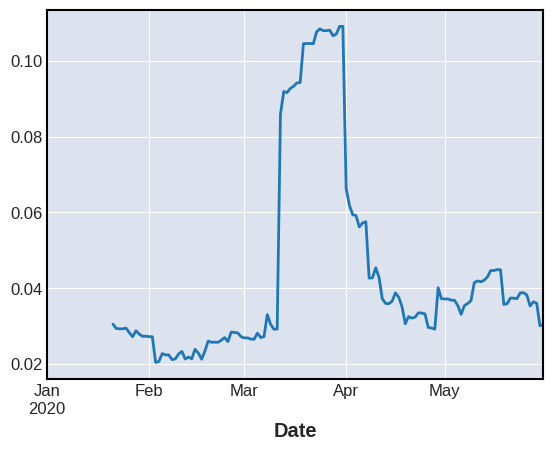

In [40]:
df['volatilidade'].plot()

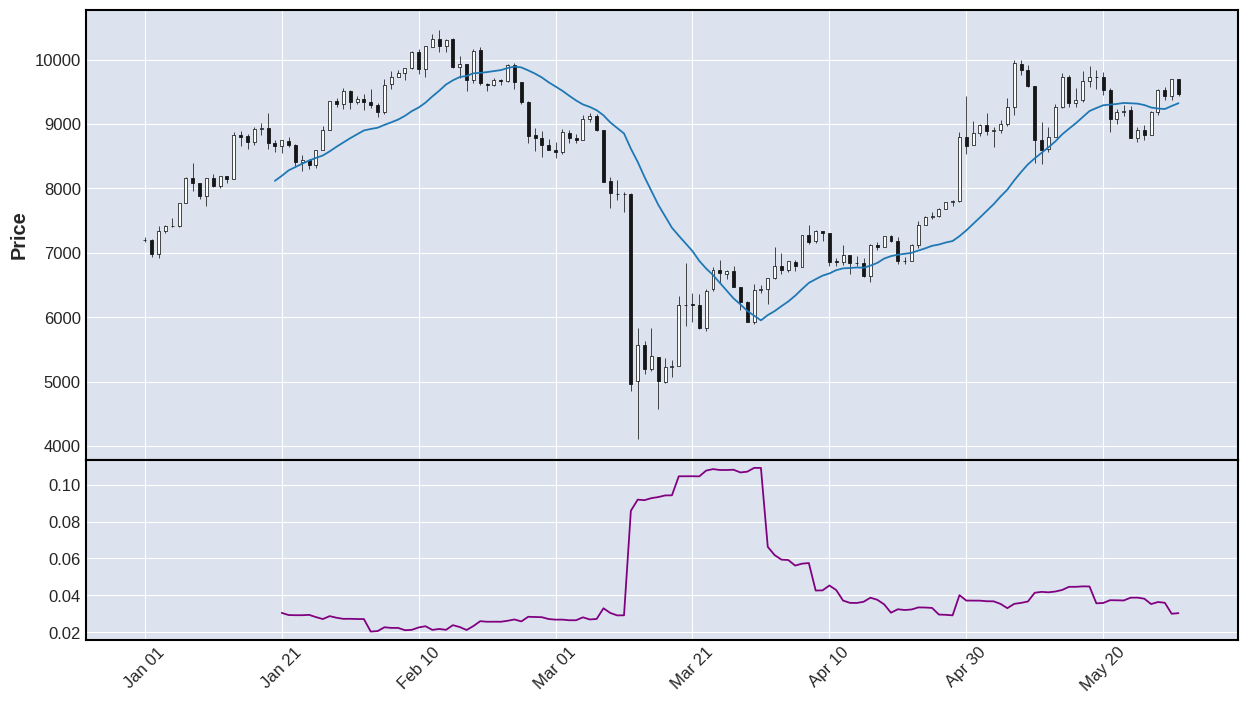

In [41]:
#Cópia do dataframe
df_plot = df

#Indicadores
plot_mean = mpf.make_addplot(df_plot['media_movel'])
plot_vol = mpf.make_addplot(df_plot['volatilidade'], panel=1, color='purple')

#Plot
mpf.plot(df_plot, type='candle', addplot=[plot_mean, plot_vol], figsize=(16,9))